In [20]:
import pandas as pd              # pandas is used to handle and analyze data (reading CSV, grouping, etc.)
import numpy as np               # numpy is used for mathematical operations if needed
import matplotlib.pyplot as plt  # matplotlib is used for data visualization (graphs and charts)
import seaborn as sns            # seaborn makes the plots look better and cleaner

# Set seaborn style for all graphs
sns.set(style="whitegrid")


data=pd.read_csv(r"C:\Users\ASUS\Documents\DMV_praticals\Datasets\retail_sales_dataset_corrected.csv");
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [22]:
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [25]:
print(data.head())

# Display basic information about the dataset
# This shows the number of entries, columns, data types, and missing values
print("\nDataset Info:")
print(data.info())

# Display summary statistics for numerical columns (like mean, min, max, etc.)
print("\nSummary Statistics:")
print(data.describe())


  invoice_no customer_id  gender  age  category  quantity    price  \
0    I138884     C241288  Female   28  Clothing         5  1500.40   
1    I317333     C111565    Male   21     Shoes         3  1800.51   
2    I127801     C266599    Male   20  Clothing         1   300.08   
3    I173702     C988172  Female   66     Shoes         5  3000.85   
4    I337046     C189076  Female   53     Books         4    60.60   

  payment_method invoice_date   shopping_mall  
0    Credit Card     5/8/2022          Kanyon  
1     Debit Card   12/12/2021  Forum Istanbul  
2           Cash    9/11/2021       Metrocity  
3    Credit Card   16/05/2021    Metropol AVM  
4           Cash   24/10/2021          Kanyon  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-n

In [27]:

# The main columns useful for aggregation:
# 'shopping_mall' → acts as region
# 'category' → represents product category
# 'quantity' and 'price' → used to calculate total sales

# Create a new column called 'sales_amount' which is the total sales for each row
# Formula: sales_amount = quantity * price
data["sales_amount"] = data["quantity"] * data["price"]

# Display the new column with few rows to check calculation
print("\nAfter adding sales_amount column:")
print(data[["quantity", "price", "sales_amount"]].head())



After adding sales_amount column:
   quantity    price  sales_amount
0         5  1500.40       7502.00
1         3  1800.51       5401.53
2         1   300.08        300.08
3         5  3000.85      15004.25
4         4    60.60        242.40


In [29]:

# Group data by 'shopping_mall' (region)
# Then calculate the total sales (sum) for each region
sales_by_region = data.groupby("shopping_mall")["sales_amount"].sum().reset_index()

# Sort the results in descending order to find the top performing regions
sales_by_region = sales_by_region.sort_values(by="sales_amount", ascending=False)

# Display the total sales amount for each region
print("\nTotal Sales by Region:")
print(sales_by_region)



Total Sales by Region:
       shopping_mall  sales_amount
5   Mall of Istanbul   50872481.68
4             Kanyon   50554231.10
6          Metrocity   37302787.33
7       Metropol AVM   25379913.19
3       Istinye Park   24618827.68
9       Zorlu Center   12901053.82
0        Cevahir AVM   12645138.20
8     Viaport Outlet   12521339.72
1  Emaar Square Mall   12406100.29
2     Forum Istanbul   12303921.24


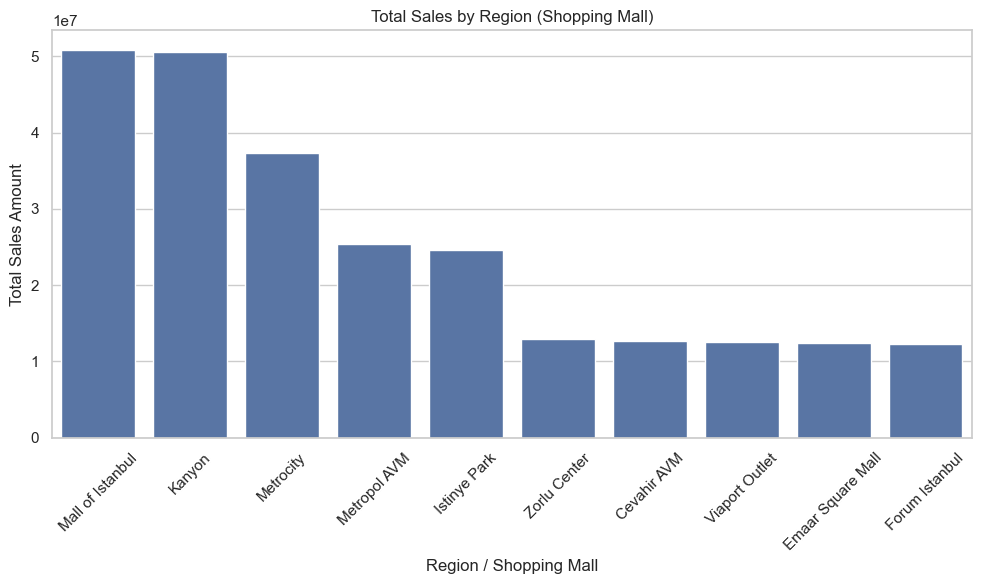

In [35]:

# ----- BAR PLOT -----
# Shows total sales amount for each region in bars

plt.figure(figsize=(10, 6))  # Set figure size for clarity
sns.barplot(x="shopping_mall", y="sales_amount", data=sales_by_region)  # Create barplot
plt.title("Total Sales by Region (Shopping Mall)")  # Title for the plot
plt.xlabel("Region / Shopping Mall")  # X-axis label
plt.ylabel("Total Sales Amount")  # Y-axis label
plt.xticks(rotation=45)  # Rotate region names for better readability
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()



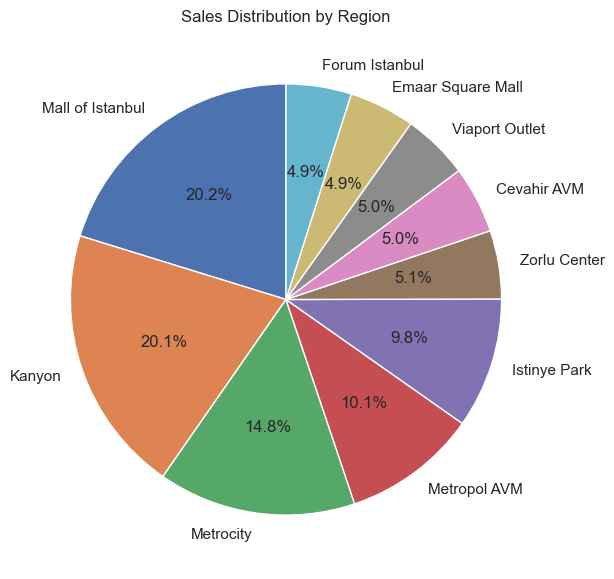

In [45]:

# ----- PIE CHART -----
# Shows the percentage share of sales for each region

plt.figure(figsize=(7,7))  # Set figure size
plt.pie(sales_by_region["sales_amount"],       # Values for each slice
        labels=sales_by_region["shopping_mall"],  # Labels for slices
        autopct="%1.1f%%",                    # Show percentage format
        startangle=90)                        # Start pie chart from top
plt.title("Sales Distribution by Region")     # Title for the chart
plt.show()

In [47]:
# ------------------------------------------------------------
# STEP 6: Identify the top-performing regions
# ------------------------------------------------------------

# Select the top 5 regions with highest sales
top_regions = sales_by_region.head(5)

# Display the result
print("\nTop Performing Regions:")
print(top_regions)



Top Performing Regions:
      shopping_mall  sales_amount
5  Mall of Istanbul   50872481.68
4            Kanyon   50554231.10
6         Metrocity   37302787.33
7      Metropol AVM   25379913.19
3      Istinye Park   24618827.68


In [49]:
# ------------------------------------------------------------
# STEP 7: Group data by both region and product category
# ------------------------------------------------------------

# Group the data by both 'shopping_mall' and 'category'
# Then calculate the total sales amount for each combination
sales_by_region_category = data.groupby(["shopping_mall", "category"])["sales_amount"].sum().reset_index()

# Display first few results to check
print("\nSales by Region and Product Category:")
print(sales_by_region_category.head())



Sales by Region and Product Category:
  shopping_mall         category  sales_amount
0   Cevahir AVM            Books      44541.00
1   Cevahir AVM         Clothing    5706321.28
2   Cevahir AVM        Cosmetics     321214.00
3   Cevahir AVM  Food & Beverage      44010.45
4   Cevahir AVM            Shoes    3243918.85


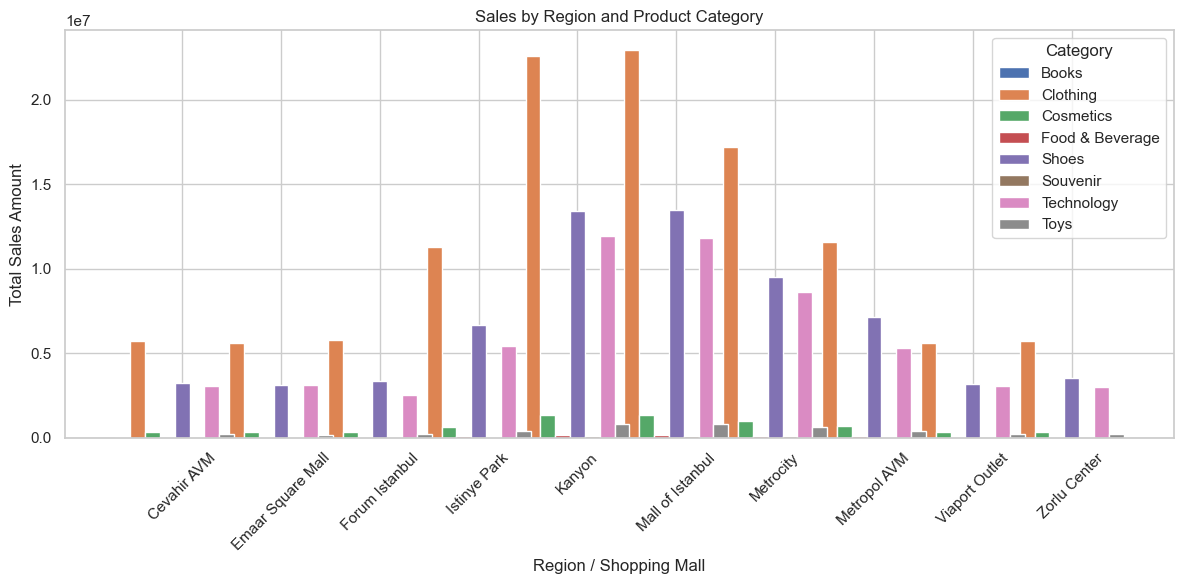

In [59]:
# ------------------------------------------------------------
# STEP 8: Create a stacked bar plot to compare sales by region & category
# ------------------------------------------------------------

# Convert the grouped data into a bar table
# Rows = shopping_mall (region), Columns = category, Values = sales_amount
# ------------------------------------------------------------

# Get unique regions and categories
regions = sales_by_region_category["shopping_mall"].unique()
categories = sales_by_region_category["category"].unique()

# Create figure
plt.figure(figsize=(12,6))

# Create offset positions for grouped bars
bar_width = 0.15
x = np.arange(len(regions))

# Plot bars for each category
for i, cat in enumerate(categories):
    subset = sales_by_region_category[sales_by_region_category["category"] == cat]
    plt.bar(x + i*bar_width, subset["sales_amount"], width=bar_width, label=cat)

# Add labels and formatting
plt.title("Sales by Region and Product Category")
plt.xlabel("Region / Shopping Mall")
plt.ylabel("Total Sales Amount")
plt.xticks(x + bar_width*(len(categories)/2), regions, rotation=45)
plt.legend(title="Category")
plt.tight_layout()
plt.show()



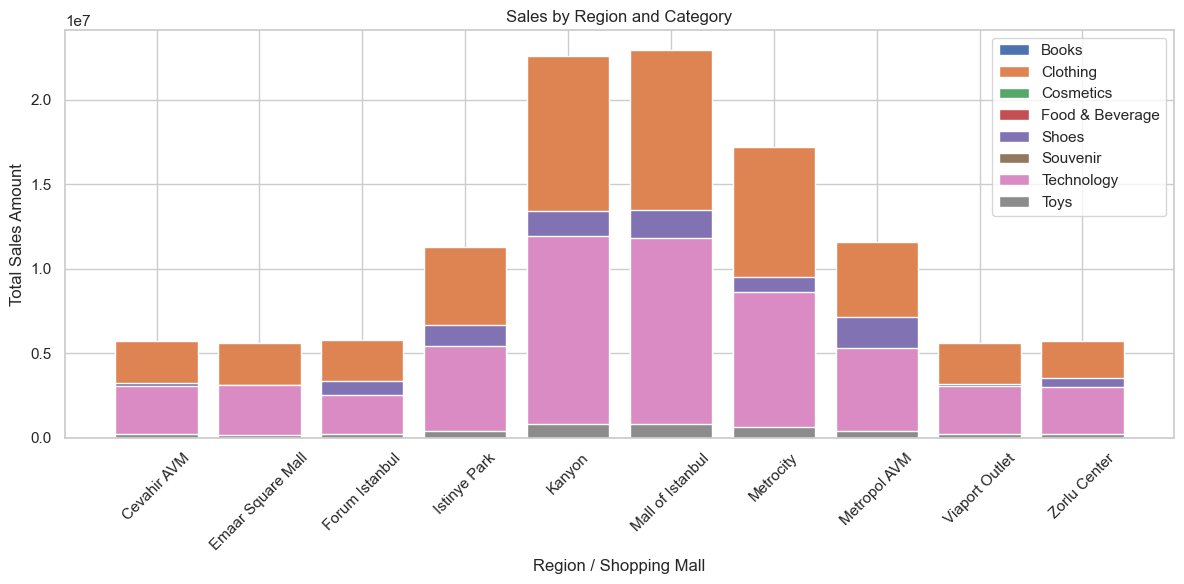

In [61]:
plt.figure(figsize=(12,6))
for cat in sales_by_region_category['category'].unique():
    subset = sales_by_region_category[sales_by_region_category['category'] == cat]
    plt.bar(subset['shopping_mall'], subset['sales_amount'], label=cat)

plt.title("Sales by Region and Category")
plt.xlabel("Region / Shopping Mall")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
